Importamos las dependencias:
 - **matplotlib**: Para las gráficas.
 - **pandas**: Para procesar/limpiar los datos.
 - **seaborn**: Para poner las gráficas un poco más bonitas.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set()
sns.set_style("whitegrid")
%matplotlib inline


Cargamos el archivo _steam.csv_ en un _dataframe_ de pandas.

Luego, con *shape*, comprobamos la _forma_ del dataframe. Es una tupla que nos indica las filas y las columnas que tiene el dataframe. En este caso, 27075 filas de datos, cada una con 18 datos (columnas)

In [2]:
steam_dataframe = pd.read_csv("csv/steam.csv")

In [3]:
steam_dataframe.shape

(27075, 18)

Con _info_, podemos ver las características de estas columnas. Este es un dataset bastante limpito, cómo podéis ver no hay nulls (campos sin valores o valores None). Nos pone también el Dtype (una manera de pandas de representar el tipo de datos).

Aquí podríamos mejorar bastante, y hacer que los campos con dtype _object_ fueran un poco más descriptivos para poder hacer cosas chulas. Por ejemplo, el campo *release_date* podría ser un *datetime*, y podríamos ver fácilmente cuanto pasa entre cada release y cosas así.

Pero tampoco hace falta rallarse.

Con *head(n)* podemos ver los *n* primeros elementos de nuestro dataframe (ordenados tal cual venían en el csv, por defecto). 

In [4]:
steam_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

In [5]:
steam_dataframe.head(10)

appid                            name release_date  english  \
0     10                  Counter-Strike   2000-11-01        1   
1     20           Team Fortress Classic   1999-04-01        1   
2     30                   Day of Defeat   2003-05-01        1   
3     40              Deathmatch Classic   2001-06-01        1   
4     50       Half-Life: Opposing Force   1999-11-01        1   
5     60                        Ricochet   2000-11-01        1   
6     70                       Half-Life   1998-11-08        1   
7     80  Counter-Strike: Condition Zero   2004-03-01        1   
8    130           Half-Life: Blue Shift   2001-06-01        1   
9    220                     Half-Life 2   2004-11-16        1   

          developer publisher          platforms  required_age  \
0             Valve     Valve  windows;mac;linux             0   
1             Valve     Valve  windows;mac;linux             0   
2             Valve     Valve  windows;mac;linux             0   
3             Valve     Valve  windows;mac;linux             0   
4  Gearbox Software     Valve  windows;mac;linux             0   
5             Valve     Valve  windows;mac;linux             0   
6             Valve     Valve  windows;mac;linux             0   
7             Valve     Valve  windows;mac;linux             0   
8  Gearbox Software     Valve  windows;mac;linux             0   
9             Valve     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   
5  Multi-player;Online Multi-Player;Valve Anti-Ch...  Action   
6  Single-player;Multi-player;Online Multi-Player...  Action   
7  Single-player;Multi-player;Valve Anti-Cheat en...  Action   
8                                      Single-player  Action   
9  Single-player;Steam Achievements;Steam Trading...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   
5        Action;FPS;Multiplayer             0              2758   
6            FPS;Classic;Action             0             27755   
7        Action;FPS;Multiplayer             0             12120   
8             FPS;Action;Sci-fi             0              3822   
9             FPS;Action;Sci-fi            33             67902   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   
5               684               175               10   5000000-10000000   
6              1100              1300               83   5000000-10000000   
7              1439               427               43  10000000-20000000   
8               420               361              205   5000000-10000000   
9              2419               691              402  10000000-20000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99  
5   3.99  
6   7.19  
7   7.19  
8   3.99  
9   7.19

Para datos categóricos está muy bien *value_counts()*: Nos muestra cuantas veces aparece cada uno de los valores de una columna (en este caso, platforms).

Pero los datos así no nos son particularmente útiles a la hora de hacer busquedas y demás. ¿Y si queremos saber qué juegos hay con soporte por defecto para Linux? Tal como está tendríamos que seleccionar los que pongan *windows;mac;linux*, *windows;linux*, *mac;linux* y *linux*. 

Un auténtico peñazo.

Pero con la función *get_dummies()* (estuve igual una hora para ver como se hacía esa shite, con diversos errores y fallos que parecían estar okay de entrada, hasta que encontré el *get_dummies*)

Básicamente, le damos un separador (**";"** en nuestro caso) y lo pasa a una matriz de Verdadero/Falso (unos y ceros).


In [6]:
steam_dataframe['platforms'].value_counts()

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
linux                    1
mac;linux                1
Name: platforms, dtype: int64

In [7]:
dummy_platforms = steam_dataframe['platforms'].str.get_dummies(';')
dummy_platforms

linux  mac  windows
0          1    1        1
1          1    1        1
2          1    1        1
3          1    1        1
4          1    1        1
...      ...  ...      ...
27070      0    0        1
27071      0    0        1
27072      0    0        1
27073      0    1        1
27074      0    1        1

[27075 rows x 3 columns]

Luego, unimos ese nuevo dataframe que nos ha creado al que teníamos antes y nos cargamos la columna "platforms", que es redundante.

Y ya podemos hacer cosas chulas como ver que juegos hay en Linux pero no en Windows, o las queries que nos de la gana.

In [8]:
steam_dataframe = pd.concat([steam_dataframe, dummy_platforms], axis=1)

In [9]:
steam_dataframe = steam_dataframe.drop(columns=['platforms'])

In [10]:
steam_dataframe.query('linux == 1 & windows == 0')

appid                              name release_date  english  \
13387  594550  Arma: Cold War Assault Mac/Linux   2017-03-14        1   
20530  805260                            PICNIC   2018-03-04        1   

                 developer            publisher  required_age     categories  \
13387  Bohemia Interactive  Bohemia Interactive            16  Single-player   
20530          A.D. Klumpp          A.D. Klumpp             0  Single-player   

                                   genres               steamspy_tags  \
13387  Violent;Action;Simulation;Strategy  Simulation;Strategy;Action   
20530                               Indie                       Indie   

       achievements  positive_ratings  negative_ratings  average_playtime  \
13387             0                40                10                 0   
20530             0                 2                 0                 0   

       median_playtime   owners  price  linux  mac  windows  
13387                0  0-20000   3.49      1    1        0  
20530                0  0-20000   0.00      1    0        0

Ahora vamos a crear una nueva columna, GSRatio, de Good to Shit ratio, que coge los *positive_ratings* de cada juego y los divide por sus *negative_ratings*.

Como métrica es un poco la mierda, porque un juego con 10 votos positivos y 1 negativo saldría como mejor que un juego con 100.000 votos positivos y 10.001 votos negativos, pero era por poner algo y fuchicar. Si se os ocurre métrica mejor, pues la pongo.

Luego creamos dos vistas agrupadas, tanto por desarrollador como por *publisher*, para poder jugar un poco más con los datos, por ejemplo:

- Ver cuanto nos costaría comprar todos los juegos de ese developer/publisher.
- Ver el GSRatio global de ese desarrollador/publisher. Sumamos el total de sus positivos y lo dividimos por la suma total de sus negativos.

In [11]:
steam_dataframe["GSRatio"] = steam_dataframe["positive_ratings"] / steam_dataframe["negative_ratings"]

In [12]:
grouped_by_devs = steam_dataframe.groupby("developer")
grouped_by_pubs = steam_dataframe.groupby("publisher")


In [13]:
total_price = grouped_by_pubs.get_group("Devolver Digital").price.sum()
positive_sum = grouped_by_pubs.get_group("Devolver Digital").positive_ratings.sum()
negative_sum = grouped_by_pubs.get_group("Devolver Digital").negative_ratings.sum()
print(f"Bundle Price: {total_price}\nGood to shit ratio: {positive_sum/negative_sum}")

Bundle Price: 627.28
Good to shit ratio: 8.34451454509121


Por último, podemos hacer una pequeña gráfica resultona con *plot()*, y luego podríamos guardarla en el formato que más nos guste con *savefig()*. 

Yo personalmente tiro por svg, que no se pixela.

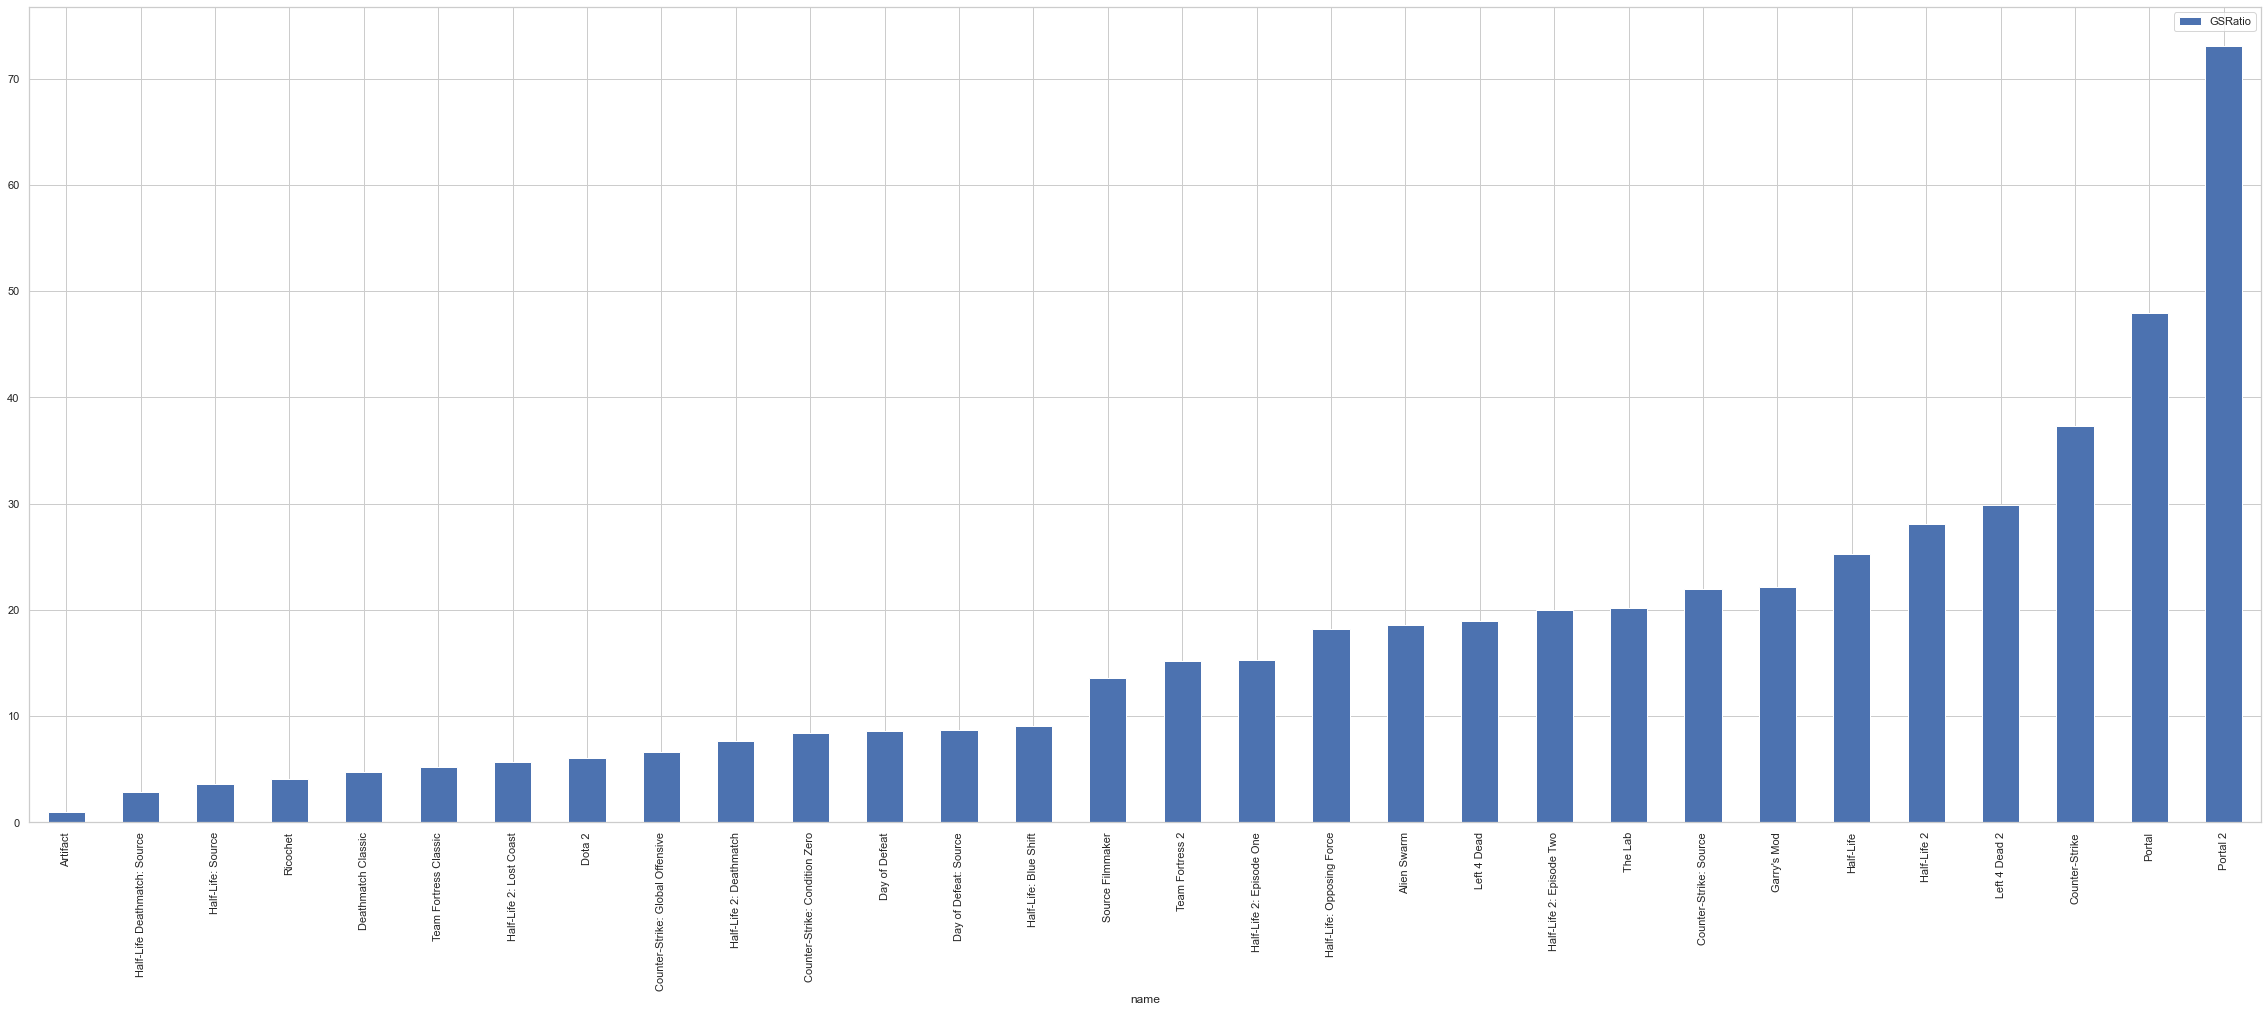

In [14]:
plot = grouped_by_pubs.get_group("Valve").sort_values(by="GSRatio").plot(kind="bar", x="name", y=["GSRatio"], figsize=(40,15), rot=90)
fig = plot.get_figure()
fig.savefig("valve_gsratio.svg")